# Kaggle. Forest Cover Type Prediction

In [1]:
import numpy as np
import pandas as pd
X = pd.read_csv('forestpred//train.csv')
X.index = list(X.pop('Id'))
y = X.pop('Cover_Type')
testX = pd.read_csv('forestpred//test.csv')
testX.index = list(testX.pop('Id'))

In [2]:
X[0:10]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
6,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
7,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,0
8,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,0
9,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,0
10,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import bear.bear as br
reload(br)

<module 'bear.bear' from 'bear\bear.pyc'>

,Percentage


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2747.455300,156.802300,16.503100,227.942900,51.193000,1711.524300,212.779800,218.938400,134.97610,1512.192100,0.237900,0.031700,0.416900,0.313500,0.024300,0.038300,0.065600,0.055000,0.010400,0.043000,0,0.0001,0.000800,0.140000,0.026200,0.016100,0.030900,0.012000,0,0.008900,0.04350,0.004200,0.003300,0.008900,0.000900,0.023000,0.048600,0.01620,0.0001,0.003000,0.000900,0.000600,0.084000,0.047500,0.021700,0.045800,0.040100,0.00160,0.007200,0.00070,0.002400,0.049900,0.043600,0.030700
std,420.564968,110.044406,8.479739,212.931015,62.048487,1321.823856,30.610423,22.738133,46.01199,1103.954286,0.425819,0.175209,0.493071,0.463939,0.153987,0.191929,0.247594,0.227992,0.101454,0.202867,0,0.0100,0.028274,0.347004,0.159738,0.125866,0.173055,0.108891,0,0.093924,0.20399,0.064674,0.057354,0.093924,0.029988,0.149911,0.215041,0.12625,0.0100,0.054693,0.029988,0.024489,0.277402,0.212716,0.145709,0.209062,0.196204,0.03997,0.084551,0.02645,0.048933,0.217749,0.204214,0.172512
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2373.000000,65.000000,10.000000,67.000000,5.000000,766.500000,196.000000,207.000000,106.00000,726.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2751.000000,126.000000,15.000000,180.000000,32.000000,1317.000000,220.000000,222.000000,138.00000,1253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3101.000000,261.000000,22.000000,330.000000,79.000000,2266.500000,235.000000,235.000000,167.00000,1994.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0

,Counts
4,1458
7,1455
6,1443
2,1423
3,1420
5,1415
1,1386


,corr,p-value
Soil_Type38,0.263827,7.060150e-159
Soil_Type39,0.246859,1.010996e-138
Wilderness_Area1,-0.239679,1.199050e-130
Soil_Type29,-0.228293,2.179321e-118
Soil_Type40,0.203410,7.126145e-94
Soil_Type22,-0.188970,4.782907e-81
Soil_Type23,-0.163925,3.537875e-61
Soil_Type12,-0.136854,5.202879e-43
Wilderness_Area3,0.136034,1.636325e-42
Soil_Type10,0.127475,1.678362e-37


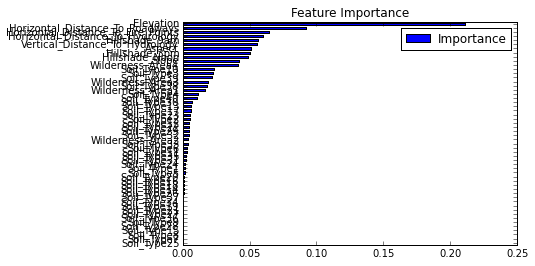

,Percentage


['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type6', 'Soil_Type10', 'Soil_Type12', 'Soil_Type17', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type38']


[]


['Soil_Type7', 'Soil_Type15']


['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


[]


[]


[]


In [4]:
%matplotlib inline
br.get_initial_analysis(X, y, testX, random_state=42)

In [5]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("inter", br.AddInteraction()),
                 ("modelpred", br.ModelPredictor())])

In [6]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
para_RF = {'n_estimators': [200], "max_depth": range(2,20), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_ExTree = {'n_estimators': [200], "max_depth": range(10,30), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_GBC = {"max_depth": range(1,10),
         "min_samples_leaf": range(2,11),
         "max_features": np.arange(0.3,0.9,0.1),
          'n_estimators': [200],
            'loss' : ['deviance'], 'learning_rate': [0.1, 0.05]}

rand_num = br.NumberGeneratorForModelPredictor(random_state=422)

paras = {
    'inter__add_list': [[], ['Elevation', 'Horizontal_Distance_To_Hydrology',
                             'Horizontal_Distance_To_Roadways',  'Horizontal_Distance_To_Fire_Points']],
    'inter__degree': [[2,3], [2]],
    'modelpred__modelwithparams': [['RF', para_RF],       
                                 ['ExTree', para_ExTree], ['GBC', para_GBC]],
    'modelpred__random_number': rand_num
}
search = RandomizedSearchCV(pipe, param_distributions=paras, n_iter=50, 
                            random_state=42, cv=5,scoring='accuracy', verbose=2)

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] modelpred__random_number=0.247257756749, inter__add_list=[], inter__degree=[2], modelpred__modelwithparams=['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}] 
[CV]  modelpred__random_number=0.247257756749, inter__add_list=[], inter__degree=[2], modelpred__modelwithparams=['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}] -   2.0s
[CV] modelpred__random_number=0.247257756749, inter__add_list=[], inter__degree=[2], modelpred__modelwithparams=['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:  6.6min



[CV] modelpred__random_number=0.776115459829, inter__add_list=['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'], inter__degree=[2], modelpred__modelwithparams=['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}] 
[CV]  modelpred__random_number=0.776115459829, inter__add_list=['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'], inter__degree=[2], modelpred__modelwithparams=['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}] -   3.5s
[CV] modelpred__random_number=0.776115459829, inter__add_list=['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_

[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed: 49.3min
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 76.7min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(steps=[('inter', AddInteraction(add_list=None, degree=2)), ('modelpred', ModelPredictor(modelwithparams=None, problem_type='infer', random_number=-1))]),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'modelpred__random_number': <bear.bear.NumberGeneratorForModelPredictor instance at 0x000000000A8A7B08>, 'inter__add_list': [[], ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']], 'inter__degree': [[2, 3],...es': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring='accuracy', verbose=2)

In [10]:
br.report_grid_score_with_params(search.grid_scores_, 30, model_key='modelpred__modelwithparams',
                               random_number_key='modelpred__random_number')

Model with rank: 1
Mean validation score: 0.880 (std: 0.011)
Parameters: {'modelpred__random_number': 0.7322334375219033, 'inter__add_list': ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'], 'inter__degree': [2], 'modelpred__modelwithparams': ['ExTree', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}]}
Parameters of the model:  {'n_estimators': 200, 'max_features': 0.59999999999999998, 'n_jobs': -1, 'max_depth': 27}

Model with rank: 2
Mean validation score: 0.876 (std: 0.010)
Parameters: {'modelpred__random_number': 0.9694910656467814, 'inter__add_list': ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'], 'inter__degree': [2], 'modelpred__modelwithparams': ['ExTree', {'n_estimators': 

In [11]:
prob1, prob2 = br.get_prediction_from_models(search.grid_scores_, pipe, range(1,31), 
                                             X_train, y_train, X_val, cv=1, problem_type='regression')

In [12]:
from sklearn.metrics import accuracy_score
pred = prob2.mode(axis=1)[0]
accuracy_score(y_val, pred)

0.89550264550264547

In [13]:
prob1, prob2 = br.get_prediction_from_models(search.grid_scores_, pipe, range(1,31), 
                                             X, y, testX, cv=1, problem_type='regression')

In [14]:
finalpred = prob2.mode(axis=1)[0].astype(int)
predfinal = pd.Series(finalpred, name='Cover_Type', index=testX.index)
predfinal.to_csv('forest_sub_5.csv', header=True, index_label='Id')

#(using voting)
#accuracy 0.79492
#rank 205/1694